In [ ]:
####Observations:
# 1. Capomulin and Ramicane had the most time points
# 2. As time increases, tumor volume is likely to decrease
# 3. As weight increases, tumor volume is likely to increase
#
#
#
#

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 

In [16]:
mouse_df = pd.read_csv("data/Mouse_metadata.csv")
study_df = pd.read_csv("data/Study_results.csv")
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [17]:
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [18]:
mouse_study_df = pd.merge(study_df, mouse_df, how= 'left', on =['Mouse ID', 'Mouse ID'])
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
unique_mice = mouse_study_df['Mouse ID'].unique()
unique_mice_counts = len(unique_mice)
unique_mice_counts


249

In [20]:
mouse_study_df['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [21]:
mouse_study_df.loc[(mouse_study_df['Mouse ID'] == 'g989'), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
cleanmouse_study_df = mouse_study_df.loc[(mouse_study_df['Mouse ID'] != 'g989'), :]
unique_mice_update = cleanmouse_study_df['Mouse ID'].unique()
unique_mice_update_count = len(unique_mice_update)
unique_mice_update_count

248

In [144]:
meantumor = pd.DataFrame(cleanmouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
meantumor
mediantumor = pd.DataFrame(cleanmouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
mediantumor
variancetumor = pd.DataFrame(cleanmouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
variancetumor
stdtumor = pd.DataFrame(variancetumor**(1/2))
stdtumor
semtumor = pd.DataFrame(cleanmouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
semtumor
summary_df = pd.DataFrame({'Mean Tumor Volume' : meantumor['Tumor Volume (mm3)'],
                           'Median Tumor Volume' : mediantumor['Tumor Volume (mm3)'],
                           'Variance' : variancetumor['Tumor Volume (mm3)'],
                           'Standard Deviation' : stdtumor['Tumor Volume (mm3)'],
                           'SEM' : semtumor['Tumor Volume (mm3)']})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:title={'center':'Number of Timepoints by Regimen Type'}, xlabel='Drug Regimen', ylabel='Timepoint Count'>

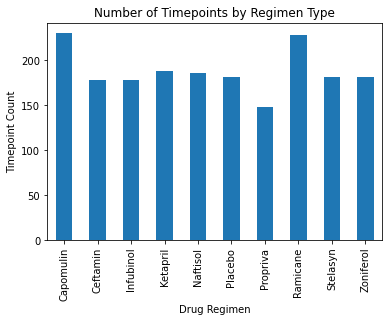

In [107]:
grouped_timepoints_df = pd.DataFrame(cleanmouse_study_df.groupby('Drug Regimen')['Timepoint'].count())
grouped_timepoints_df
barplotpd = grouped_timepoints_df['Timepoint'].plot(kind = 'bar')
barplotpd.set_ylabel('Timepoint Count')
barplotpd.set_title('Number of Timepoints by Regimen Type')
barplotpd



Text(0.5, 1.0, 'Number of Timepoints by Regimen Type')

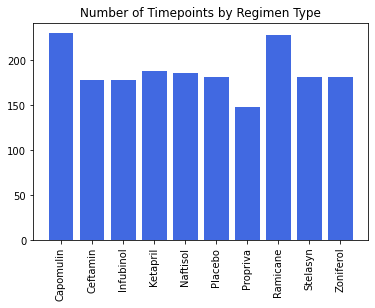

In [108]:
ypoints = grouped_timepoints_df['Timepoint'].tolist()
xpoints = grouped_timepoints_df.index.tolist()
plt.bar(xpoints, ypoints, color = 'royalblue', align = 'center')
plt.xticks(rotation = 90)
plt.title('Number of Timepoints by Regimen Type')

Text(0.5, 1.0, 'Distribution of Male and Female Mice')

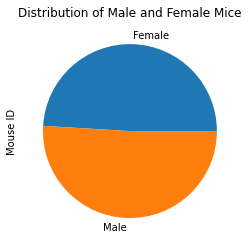

In [111]:
#pieplotpd = grouped_timepoints_df['Timepoint'].plot(kind = 'bar')
grouped_sex_df = cleanmouse_study_df.groupby('Sex')['Mouse ID'].count()
pieplot = grouped_sex_df.plot(kind = 'pie')
pieplot.set_title('Distribution of Male and Female Mice')

Text(0.5, 1.0, 'Distribution of Male and Female Mice')

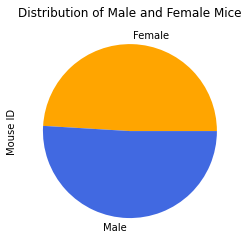

In [113]:


wedge1 = grouped_sex_df['Male']
wedge2 = grouped_sex_df['Female']
plt.pie([wedge2, wedge1], labels = ['Female', 'Male'], colors = ['orange','royalblue'])
plt.ylabel('Mouse ID')
plt.title('Distribution of Male and Female Mice')

In [24]:
maxtimepoint_df = pd.DataFrame(cleanmouse_study_df.groupby('Mouse ID')['Timepoint'].max())
maxtimepoint_df


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [25]:
mergetimepoint_df = pd.merge(maxtimepoint_df, cleanmouse_study_df, how= 'left', on =['Timepoint', 'Timepoint'])
mergetimepoint_df.count()

Timepoint             39996
Mouse ID              39996
Tumor Volume (mm3)    39996
Metastatic Sites      39996
Drug Regimen          39996
Sex                   39996
Age_months            39996
Weight (g)            39996
dtype: int64

In [28]:
treatmentnames = mergetimepoint_df['Drug Regimen'].unique().tolist()
treatmentnames
tumorvolumedata = []

In [31]:
for i in treatmentnames:
        tumorvolumedata.append(mergetimepoint_df.loc[(mergetimepoint_df['Drug Regimen'] == i), 'Tumor Volume (mm3)'])
ramican = pd.DataFrame(tumorvolumedata[0]).reset_index(drop = True)
Capomulin = pd.DataFrame(tumorvolumedata[1]).reset_index(drop = True)
Ceftamin = pd.DataFrame(tumorvolumedata[2]).reset_index(drop = True)
Naftisol = pd.DataFrame(tumorvolumedata[3]).reset_index(drop = True)
Placebo = pd.DataFrame(tumorvolumedata[4]).reset_index(drop = True)
Ketapril = pd.DataFrame(tumorvolumedata[5]).reset_index(drop = True)
Infubinol = pd.DataFrame(tumorvolumedata[6]).reset_index(drop = True)
Zoniferol = pd.DataFrame(tumorvolumedata[7]).reset_index(drop = True)
Stelasyn = pd.DataFrame(tumorvolumedata[8]).reset_index(drop = True)
Propriva = pd.DataFrame(tumorvolumedata[9]).reset_index(drop = True)

Propriva


,Tumor Volume (mm3)
0,64.957562
1,62.191414
2,64.911363
3,58.633404
4,70.492788
...,...
2786,64.911363
2787,58.633404
2788,70.492788
2789,72.455421


In [32]:
treatmenttime_df = pd.DataFrame({'Ramicane' : ramican['Tumor Volume (mm3)'],
                                 'Capomulin' : Capomulin['Tumor Volume (mm3)'],
                                 'Ceftamin' : Ceftamin['Tumor Volume (mm3)'],
                                #'Naftisol' : Naftisol['Tumor Volume (mm3)'],
                                #'Placebo' : Placebo['Tumor Volume (mm3)'],
                                #'Ketapril' : Ketapril['Tumor Volume (mm3)'],
                                'Infubinol' : Infubinol['Tumor Volume (mm3)'],
                                #'Zoniferol' : Zoniferol['Tumor Volume (mm3)'],
                                #'Stelasyn' : Stelasyn['Tumor Volume (mm3)'],
                                #'Propriva' : Propriva['Tumor Volume (mm3)'
                                 })
treatmenttime_df

,Ramicane,Capomulin,Ceftamin,Infubinol
0,31.095335,38.982878,59.851956,67.685569
1,38.407618,34.455298,64.729837,72.226731
2,45.220869,41.483008,68.594745,62.754451
3,36.374510,37.074024,61.849023,65.525743
4,30.276232,32.377357,67.527482,66.196912
...,...,...,...,...
5473,NaN,40.728578,NaN,NaN
5474,NaN,38.125164,NaN,NaN
5475,NaN,47.685963,NaN,NaN
5476,NaN,41.581521,NaN,NaN


In [61]:
treatmenttime_df['Infubinol'].max()

72.2267309

In [62]:
lowerq = treatmenttime_df.quantile(.25)
upperq = treatmenttime_df.quantile(.75)

iqr = upperq - lowerq
iqr
lowerbound = lowerq - (1.5 * iqr)
upperbound = upperq + (1.5 *iqr)
print('Treatment lower bounds: ' + str(lowerbound))
print('Treatment upper bounds: ' +str(upperbound))

stay = True

for x in treatmenttime_df['Ramicane']:
    if x < 19.334692:
        print('Ramicane has an outlier of ' + str(x))
        break

for x in treatmenttime_df['Capomulin']:
    if x < 23.813809:
        print('Capomulin has an outlier of ' + str(x))
        break
    
for x in treatmenttime_df['Ceftamin']:
    if x < 28.312873:
        print('Ceftamin has an outlier of ' + str(x))
        break
for x in treatmenttime_df['Infubinol']:
    if x < 26.974642:
        print('Infubinol has an outlier of ' + str(x))
        break
for x in treatmenttime_df['Ramicane']:
    if x > 57.275253:
        print('Ramicane has an outlier of ' + str(x))
        break
for x in treatmenttime_df['Capomulin']:
    if x > 54.880338:
        print('Capomulin has an outlier of ' + str(x))
        break        
for x in treatmenttime_df['Ceftamin']:
    if x > 84.563555:
        print('Ceftamin has an outlier of ' + str(x))
        break        
for x in treatmenttime_df['Infubinol']:
    if x > 86.437174:
        print('Infubinol has an outlier of ' + str(x))
        break        



Treatment lower bounds: Ramicane     19.334692
Capomulin    23.813809
Ceftamin     28.312873
Infubinol    26.974642
dtype: float64
Treatment upper bounds: Ramicane     57.275253
Capomulin    54.880338
Ceftamin     84.563555
Infubinol    86.437174
dtype: float64
Capomulin has an outlier of 23.34359787


Text(0, 0.5, 'Final Time Point')

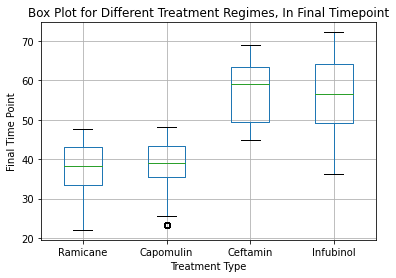

In [143]:
bxplot = treatmenttime_df.boxplot()
bxplot.set_title('Box Plot for Different Treatment Regimes, In Final Timepoint')
bxplot.set_xlabel('Treatment Type')
bxplot.set_ylabel('Final Time Point')

In [117]:
onemouse_df = cleanmouse_study_df.loc[(cleanmouse_study_df['Mouse ID'] == 'b128'), :]
onemouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


Text(0.5, 1.0, 'Timepoint Against Tumor Volume in Capomulin Treated Mouse')

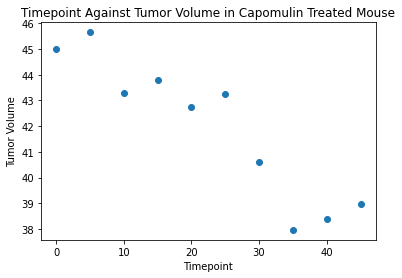

In [119]:
plt.scatter(onemouse_df['Timepoint'], onemouse_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.title('Timepoint Against Tumor Volume in Capomulin Treated Mouse')

The correlation between both factors is 0.525699555207717


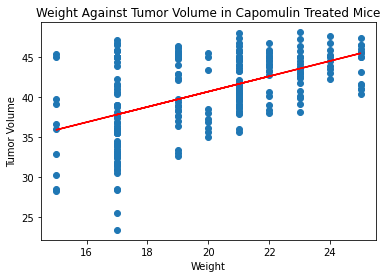

In [140]:
capomulin_df = cleanmouse_study_df.loc[(cleanmouse_study_df['Drug Regimen'] == 'Capomulin'), :]
capomulin_df.head()
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
regress_values = capomulin_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel('Weight')
plt.title('Weight Against Tumor Volume in Capomulin Treated Mice')
plt.plot(capomulin_df['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (8,6), fontsize=15, color = 'black')

correlation = st.pearsonr(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
print('The correlation between both factors is ' + str(correlation[0]))

